# Calendar Scheduler

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from cal_helper import *
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import re
matplotlib.font_manager._rebuild()

In [3]:
(creds, service) = get_creds_service()
cal_dict = load_calendars()
start_date = get_datetime_obj(26, 8, 2019)
events = list_all_research_events(start_date, creds, service, cal=cal_dict['research_cal'])

In [4]:
event_types = ['MIPPE', 'NextFlex']
sorted_events = {}
totals = {}
unsorted = []
for i in event_types:
    sorted_events[i] = {}
    totals[i] = datetime.timedelta(seconds=0)
for x in range(len(events)):
    for y in event_types:
        if (events[x].event_type == y):
            totals[y] += events[x].dura
            try:
                sorted_events[y][events[x].date] += events[x].dura
            except KeyError:
                sorted_events[y][events[x].date]  = events[x].dura
        else:
            unsorted += [events[x]]

In [5]:
print(sorted_events['NextFlex'])

{datetime.date(2019, 8, 28): datetime.timedelta(seconds=9000), datetime.date(2019, 8, 29): datetime.timedelta(seconds=5400), datetime.date(2019, 9, 3): datetime.timedelta(seconds=7200), datetime.date(2019, 9, 4): datetime.timedelta(seconds=18000), datetime.date(2019, 9, 16): datetime.timedelta(seconds=21600), datetime.date(2019, 9, 17): datetime.timedelta(seconds=5400), datetime.date(2019, 9, 18): datetime.timedelta(seconds=14400), datetime.date(2019, 9, 23): datetime.timedelta(seconds=5400), datetime.date(2019, 10, 18): datetime.timedelta(seconds=9000), datetime.date(2019, 10, 21): datetime.timedelta(seconds=7200), datetime.date(2019, 10, 31): datetime.timedelta(seconds=3600), datetime.date(2019, 11, 1): datetime.timedelta(seconds=2700), datetime.date(2019, 11, 4): datetime.timedelta(seconds=10800), datetime.date(2019, 11, 5): datetime.timedelta(seconds=18000), datetime.date(2019, 11, 6): datetime.timedelta(seconds=16200), datetime.date(2019, 11, 16): datetime.timedelta(seconds=14400)

In [6]:
sorted_events['NextFlex'][datetime.date(2019, 9, 16)]

datetime.timedelta(seconds=21600)

In [7]:
totals

{'MIPPE': datetime.timedelta(days=12, seconds=11700),
 'NextFlex': datetime.timedelta(days=3, seconds=13500)}

In [8]:
dates.date2num(list(sorted_events['NextFlex'].keys())[0])

737299.0

In [9]:
cur = datetime.date(2019, 8, 26)
end = datetime.date(2020, 5,  1)
x_vals = []
y_vals = []
running_totals = []
for x in event_types:
    y_vals += [[]]
    running_totals += [datetime.timedelta(seconds=0)]
while(cur != end):
    x_vals += [cur]
    for x in event_types:
        try:
            dur = sorted_events[x][cur]
            running_totals[event_types.index(x)] += dur
        except KeyError:
            pass
#         y_vals[event_types.index(x)] += [running_totals[event_types.index(x)] / totals[x] * 100]
        y_vals[event_types.index(x)] += [running_totals[event_types.index(x)] / datetime.timedelta(hours=1)]
    cur += datetime.timedelta(days=1)

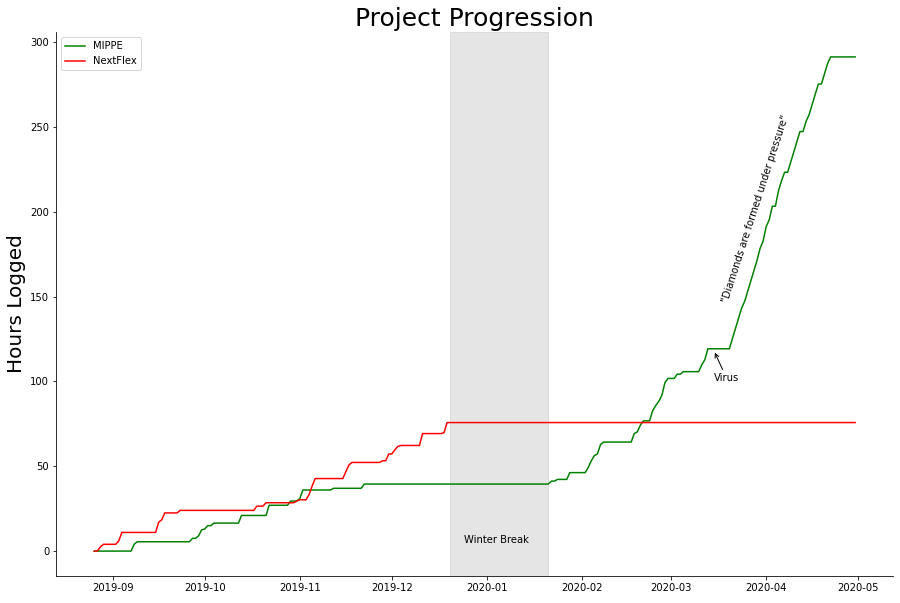

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.axvspan(dates.date2num(datetime.date(2019, 12, 20)), dates.date2num(datetime.date(2020, 1, 21)), 
            color='grey', alpha=0.2)
ax.set_title("Project Progression", fontdict={'fontsize':25})
ax.set_ylabel("Hours Logged", fontdict={'fontsize':20})
ax.annotate("Winter Break", xy=(.515,.1), xycoords='figure fraction')
ax.annotate("Virus", xy=(dates.date2num(datetime.date(2020, 3, 15)),118), 
            xytext=(dates.date2num(datetime.date(2020, 3, 15)),100), 
            arrowprops=dict(arrowstyle='->'), xycoords='data')
ax.annotate('"Diamonds are formed under pressure"', xy=(.8,.5), xycoords='figure fraction', rotation=72)
plt.plot_date(dates.date2num(x_vals), y_vals[0], 'g-', label='MIPPE')
plt.plot_date(dates.date2num(x_vals), y_vals[1], 'r-', label='NextFlex')
ax.legend()

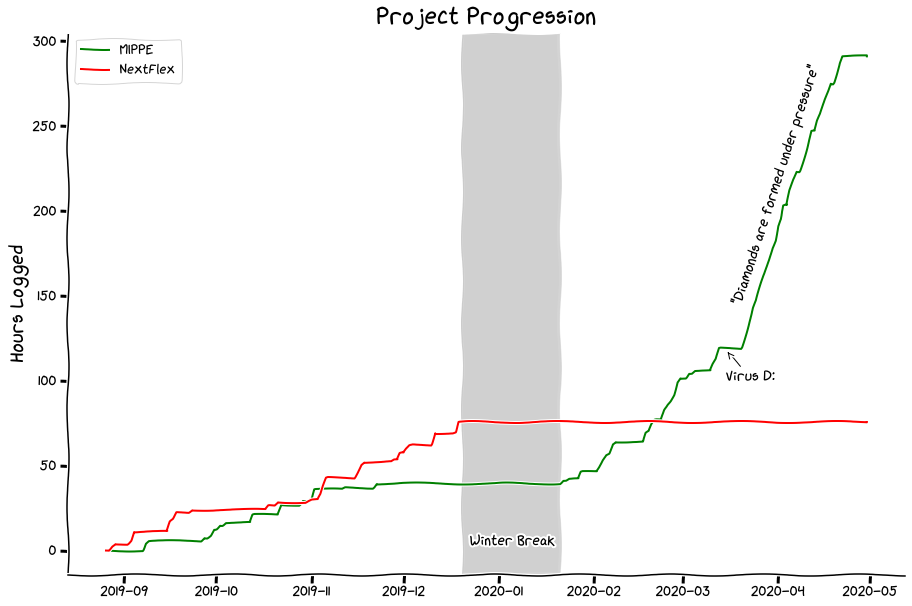

In [11]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15,10))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.axvspan(dates.date2num(datetime.date(2019, 12, 20)), dates.date2num(datetime.date(2020, 1, 21)), 
                color='grey', alpha=0.2)
    ax.set_title("Project Progression", fontdict={'fontsize':25})
    ax.set_ylabel("Hours Logged", fontdict={'fontsize':20})
    ax.annotate("Winter Break", xy=(.515,.1), xycoords='figure fraction', fontsize=15)
    ax.annotate("Virus D:", xy=(dates.date2num(datetime.date(2020, 3, 15)),118), 
                xytext=(dates.date2num(datetime.date(2020, 3, 15)),100), 
                arrowprops=dict(arrowstyle='->'), xycoords='data', fontsize=15)
    ax.annotate('"Diamonds are formed under pressure"', xy=(.8,.5), xycoords='figure fraction', 
                fontsize=15, rotation=72)
    plt.plot_date(dates.date2num(x_vals), y_vals[0], 'g-', label='MIPPE', antialiased=True)
    plt.plot_date(dates.date2num(x_vals), y_vals[1], 'r-', label='NextFlex')
    ax.legend()
#     plt.savefig("project_progression.png")

In [ ]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15,10))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Productivity vs num granola bars
    
    # Engineering effort vs num printer pages
    ax.set_title("550 Antics", fontdict={'fontsize':25})
    ax.set_ylabel("Hours Logged", fontdict={'fontsize':20})
    ax.annotate("Winter Break", xy=(.515,.1), xycoords='figure fraction')
    ax.annotate("Virus xd", xy=(dates.date2num(datetime.date(2020, 3, 15)),118), 
                xytext=(dates.date2num(datetime.date(2020, 3, 15)),100), 
                arrowprops=dict(arrowstyle='->'), xycoords='data')
    ax.annotate('"Diamonds are formed under pressure"', xy=(.8,.5), xycoords='figure fraction', rotation=72)
    plt.plot_date(dates.date2num(x_vals), y_vals[0], 'g-', label='MIPPE')
    plt.plot_date(dates.date2num(x_vals), y_vals[1], 'r-', label='NextFlex')
    ax.legend()
#     plt.savefig("project_progression.png")